## Sobre o desafio

Com base no módulo que acabamos de ver, junte suas anotações e conhecimento adquirido para analisar a seguinte base de dados:

[netflix daily top 10.csv](https://prod-files-secure.s3.us-west-2.amazonaws.com/08f749ff-d06d-49a8-a488-9846e081b224/2dc4ff7c-99f5-4b66-84ba-5c8714c90623/netflix_daily_top_10.csv)

Dessa base, analise e extraia:

- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

## EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./netflix daily top 10.csv')
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


### Tipos de dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


### Verificar Dados Nulos

In [7]:
df['Netflix Exclusive'].unique()

array(['Yes', nan], dtype=object)

Vou considerar NaN em Neflix Exclusive como No

In [23]:
df['Netflix Exclusive'].fillna('No', inplace=True)

In [26]:
df['Netflix Exclusive'].unique()

array(['Yes', 'No'], dtype=object)

### Período da análise feita

In [28]:
df['As of'] = pd.to_datetime(df['As of'])
df.dtypes

As of                   datetime64[ns]
Rank                             int64
Year to Date Rank               object
Last Week Rank                  object
Title                           object
Type                            object
Netflix Exclusive               object
Netflix Release Date            object
Days In Top 10                   int64
Viewership Score                 int64
dtype: object

In [40]:
end = len(df) - 1
delta_time = df['As of'].sort_values().iloc[end] - df['As of'].sort_values().iloc[0]
print(f'Período de Análise: {delta_time.days} dias')

Período de Análise: 709 dias


### Tamanho da base de dados

In [41]:
dimensions = df.shape
print(f'Tamanho da base de dados: \n {dimensions[0]} linhas e {dimensions[1]} colunas')

Tamanho da base de dados: 
 7100 linhas e 10 colunas


### Outliers
<p> Os filmes que passaram mais tempo no top 10 </p>

In [44]:
len(df['Title'].unique())

645

In [46]:
df[df['Title'] == 'Ozark']

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
11,2020-04-02,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",6,54
21,2020-04-03,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",7,63
31,2020-04-04,2,2,2,Ozark,TV Show,Yes,"Jul 21, 2017",8,72
41,2020-04-05,2,2,2,Ozark,TV Show,Yes,"Jul 21, 2017",9,81
...,...,...,...,...,...,...,...,...,...,...
6954,2022-02-25,5,5,5,Ozark,TV Show,Yes,"Jul 21, 2017",85,524
6967,2022-02-26,8,5,8,Ozark,TV Show,Yes,"Jul 21, 2017",86,527
6979,2022-02-27,10,8,7,Ozark,TV Show,Yes,"Jul 21, 2017",87,528
6986,2022-02-28,7,10,7,Ozark,TV Show,Yes,"Jul 21, 2017",88,532


In [51]:
max_days = df.groupby('Title')['Days In Top 10'].max().sort_values(ascending=False)
max_days

Title
Cocomelon                     428
Ozark                          89
Cobra Kai                      81
Manifest                       80
The Queenâs Gambit           73
                             ... 
Dark Shadows                    1
Elves                           1
Rango                           1
One on One                      1
Jojoâs Bizarre Adventure      1
Name: Days In Top 10, Length: 645, dtype: int64

In [54]:
import matplotlib.pyplot as plt

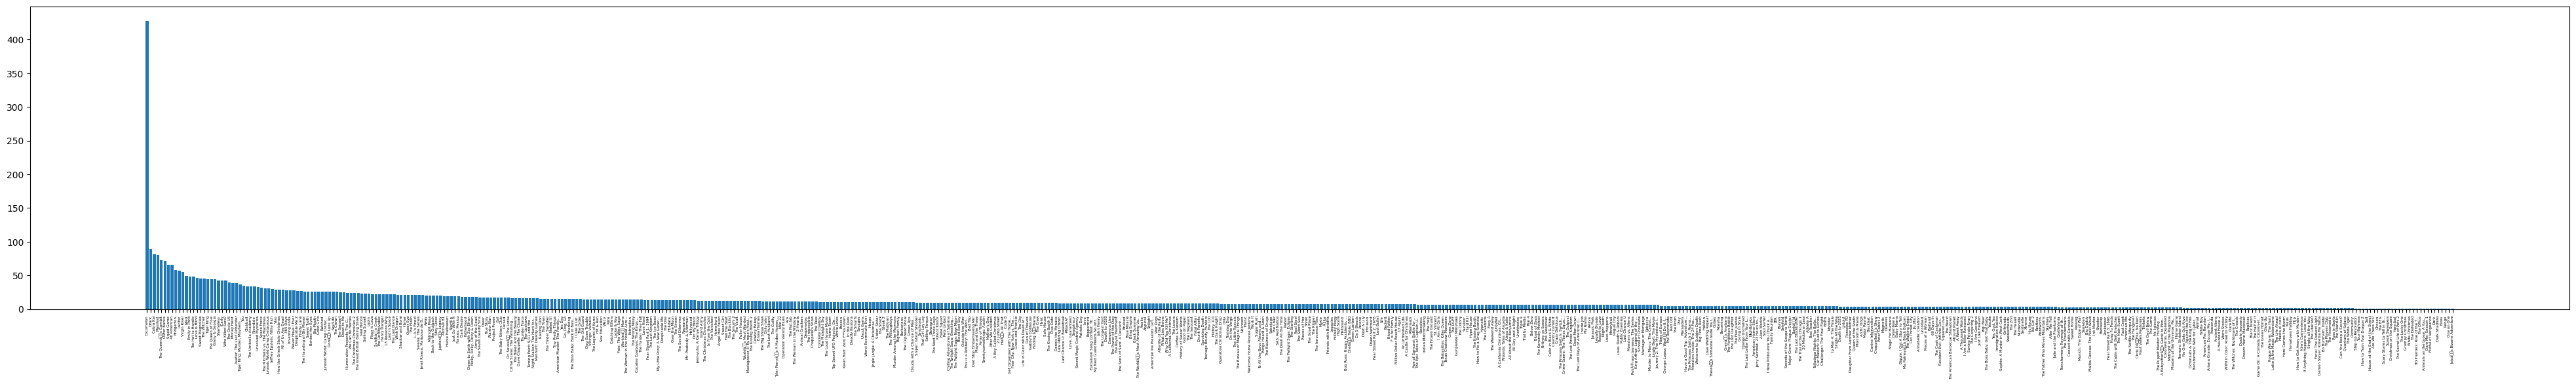

In [60]:
plt.figure(figsize=(50, 6))
plt.bar(max_days.index, max_days.values)
plt.xticks(rotation='vertical', size=4)
plt.show()

In [71]:
print(f'Claramente {max_days.index[0]} com {max_days.iloc[0]} dias no top 10 é um outlier. \n \nExistem outros?')

Claramente Cocomelon com 428 dias no top 10 é um outlier. 
 
Existem outros?


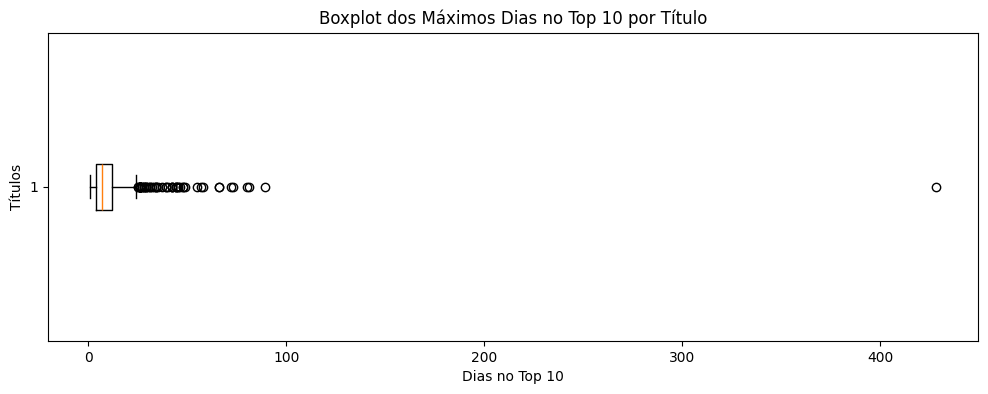

In [75]:
plt.figure(figsize=(12, 4))
plt.boxplot(max_days, vert=False)
plt.title('Boxplot dos Máximos Dias no Top 10 por Título')
plt.xlabel('Dias no Top 10')
plt.ylabel('Títulos')
plt.show()

Temos alguns outliers

#### Calculando outliers por IQR

In [89]:
max_days.describe().apply(lambda x: f'{x:.2f}')

count    645.00
mean      11.18
std       19.99
min        1.00
25%        4.00
50%        7.00
75%       12.00
max      428.00
Name: Days In Top 10, dtype: object

In [91]:
q1 = max_days.quantile(.25)
q3 = max_days.quantile(.75) 
iqr = q3 - q1
iqr

8.0

In [93]:
lim_inf = q1 - iqr
lim_sup = q3 + iqr
print(f'Limite Superior: {lim_sup} dias \nLimite Inferior: {lim_inf} dias')

Limite Superior: 20.0 dias 
Limite Inferior: -4.0 dias


In [95]:
max_days[max_days > lim_sup]

Title
Cocomelon                       428
Ozark                            89
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
Queer Eye                        21
The Flash                        21
L.A.'s Finest                    21
Selena: The Series               21
Jenni Rivera: Mariposa de B…     21
Name: Days In Top 10, Length: 78, dtype: int64

78 outliers por IQR

#### Calculando outliers por zscore

In [101]:
from scipy.stats import zscore

In [98]:
z = zscore(max_days)
z

Title
Cocomelon                     20.871460
Ozark                          3.896630
Cobra Kai                      3.496044
Manifest                       3.445971
The Queenâs Gambit           3.095458
                                ...    
Dark Shadows                  -0.509815
Elves                         -0.509815
Rango                         -0.509815
One on One                    -0.509815
Jojoâs Bizarre Adventure    -0.509815
Name: Days In Top 10, Length: 645, dtype: float64

In [102]:
z[abs(z) > 3]

Title
Cocomelon               20.871460
Ozark                    3.896630
Cobra Kai                3.496044
Manifest                 3.445971
The Queenâs Gambit     3.095458
Outer Banks              3.045385
Name: Days In Top 10, dtype: float64

In [112]:
z_outliers = list(z[abs(z) > 3].index)
print('São considerado Outliers os que estão as 3 desvios padrão da média. \nQue são as seguintes series: \n')
for series in z_outliers:
  print(series)
print(f'\nNum total de {len(z_outliers)} series.')

São considerado Outliers os que estão as 3 desvios padrão da média. 
Que são as seguintes series: 

Cocomelon
Ozark
Cobra Kai
Manifest
The Queenâs Gambit
Outer Banks

Num total de 6 series.
